# Tutorial 5: Spiking Networks with Synaptic Transmission Delay

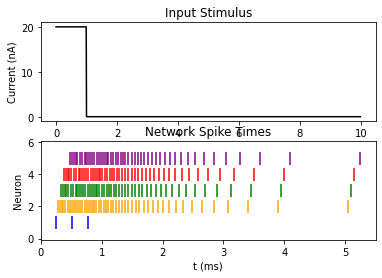

In [1]:
# Add the library to the path
# If jupyter cannot find SNS-Toolbox
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np
import matplotlib.pyplot as plt

from sns_toolbox.design.networks import Network
from sns_toolbox.design.neurons import SpikingNeuron
from sns_toolbox.design.connections import SpikingSynapse

from sns_toolbox.simulate.backends import SNS_Numpy
from sns_toolbox.simulate.simulate_utilities import spike_raster_plot

"""Define our types"""
neuron_type = SpikingNeuron()
synapse_type_d0 = SpikingSynapse(transmission_delay=0)   # Transmission delay of 0 dt
synapse_type_d5 = SpikingSynapse(transmission_delay=5)   # Transmission delay of 5 dt
synapse_type_d10 = SpikingSynapse(transmission_delay=10)   # Transmission delay of 10 dt
synapse_type_d20 = SpikingSynapse(transmission_delay=20)   # Transmission delay of 20 dt

"""Create our network"""
net = Network(name='Tutorial 5 Network')

net.add_neuron(neuron_type, name='Source', color='blue')
net.add_neuron(neuron_type, name='D0', color='orange')
net.add_neuron(neuron_type, name='D5', color='green')
net.add_neuron(neuron_type, name='D10', color='red')
net.add_neuron(neuron_type, name='D20', color='purple')

net.add_connection(synapse_type_d0, 'Source', 'D0')
net.add_connection(synapse_type_d5, 'Source', 'D5')
net.add_connection(synapse_type_d10, 'Source', 'D10')
net.add_connection(synapse_type_d20, 'Source', 'D20')

net.add_output('Source', name='OSS', spiking=True)
net.add_output('D0', name='O0S', spiking=True)
net.add_output('D5', name='O5S', spiking=True)
net.add_output('D10', name='O10S', spiking=True)
net.add_output('D20', name='O20S', spiking=True)

net.add_input('Source')

# net.render_graph(view=True)

"""Simulate the network"""
dt = 0.01
t_max = 10

t = np.arange(0, t_max, dt)
inputs = np.zeros([len(t), net.get_num_inputs()])          # getNumInputs() gets the number of input nodes in a network
inputs[0:100] = 20.0
data = np.zeros([len(t), net.get_num_outputs_actual()])    # getNumOutputsActual gets the number of accessible output
                                                            # nodes in a network (since this net has populations, each
                                                            # population has n output nodes)
# Compile to numpy
model = SNS_Numpy(net, dt=dt, debug=False)

# Run for all steps
for i in range(len(t)):
    data[i,:] = model.forward(inputs[i,:])
data = data.transpose()

"""Plotting the results"""
plt.figure()
plt.subplot(2,1,1)
plt.plot(t,inputs,color='black')
plt.title('Input Stimulus')
plt.ylabel('Current (nA)')
plt.subplot(2,1,2)
spike_raster_plot(t,data[:][:],colors=['blue','orange','green','red','purple'])
plt.title('Network Spike Times')
plt.ylabel('Neuron')
plt.xlabel('t (ms)')


plt.show()